# MIMIC Features

This notebook is used to find the most common features and their names in the MIMIC3 database. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%%time
# load all rows in chartevents
df = pd.read_csv("../mimic/data_raw/CHARTEVENTS.csv.gz",
            usecols=["ITEMID"],
            dtype={"ITEMID": int})

# get count of each itemid
counts = df["ITEMID"].value_counts().sort_values(ascending=False)
del df

Wall time: 4min 19s


In [3]:
# load all itemids and names
variables = pd.read_csv("../mimic/data_raw/D_ITEMS.csv.gz",
                        dtype={"ITEMID": int})

# map between itemid and name
ITEMID_map = variables[["LABEL", 'ITEMID']].set_index('ITEMID').to_dict()['LABEL']

In [4]:
# Get name of each index
count_df = pd.DataFrame(counts)
count_df.columns = ['count']
count_df = count_df.reset_index()
count_df['Name'] = count_df.apply(lambda x: ITEMID_map[x['index']], axis=1)

Note - low index numbers are from carevue, higher are from metavision

In [9]:
print(count_df[:300].to_string())

      index    count                                      Name
0       211  5180809                                Heart Rate
1       742  3464326                                calprevflg
2       646  3418917                                      SpO2
3       618  3386719                          Respiratory Rate
4       212  3303151                              Heart Rhythm
5       161  3236350                               Ectopy Type
6       128  3216866                               Code Status
7       550  3205052                               Precautions
8      1125  2955851                              Service Type
9    220045  2762225                                Heart Rate
10   220210  2737105                          Respiratory Rate
11   220277  2671816               O2 saturation pulseoxymetry
12      159  2544519                          Ectopy Frequency
13     1484  2261065                            Risk for Falls
14       51  2096678                    Arterial BP [Sy

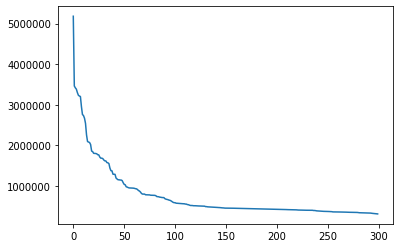

In [15]:
sns.lineplot(data=count_df[:300]['count'])
plt.title('Number of Outcomes at Each Day')
plt.ylabel('Count')
plt.xlabel('Day')
plt.legend()
plt.show(fig)

In [2]:
%%time
# load all rows in chartevents
df = pd.read_csv("../mimic/data_raw/CHARTEVENTS.csv.gz",
            usecols=["ITEMID", "CHARTTIME", "HADM_ID"],
            dtype={"ITEMID": int, "HADM_ID":int})

Wall time: 4min 49s


In [3]:
df.shape

(330712483, 3)

In [5]:
%%time
df["CHARTTIME"] = pd.to_datetime(df["CHARTTIME"], format="%Y-%m-%d %H:%M:%S")

Wall time: 1min 18s


In [6]:
%%time
df["CHARTDATE"] = df["CHARTTIME"].dt.date
del df["CHARTTIME"]

Wall time: 3min 31s


In [7]:
# add column with dummy value
df['test'] = 1

In [59]:
%%time
pivot = pd.pivot_table(df[:20000000], index=["HADM_ID", "CHARTDATE"], columns="ITEMID",
            aggfunc="first", values="test", fill_value=np.nan)

Wall time: 7.79 s


No handles with labels found to put in legend.


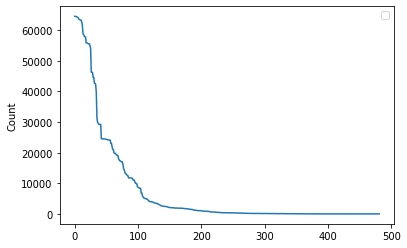

In [60]:
sns.lineplot(data=pivot.count().sort_values(ascending=False).reset_index()[0])
# plt.title('Number of Outcomes at Each Day')
plt.ylabel('Count')
# plt.xlabel('Day')
plt.legend()